# Visualising ERI-like tensors during reshaping and axis swapping

We do this to gain better understanding of the 4D structure of ERI tensors and einsums for J and K.

Overview below, code blocks that generate the images as well as equality tests for einsums come after.

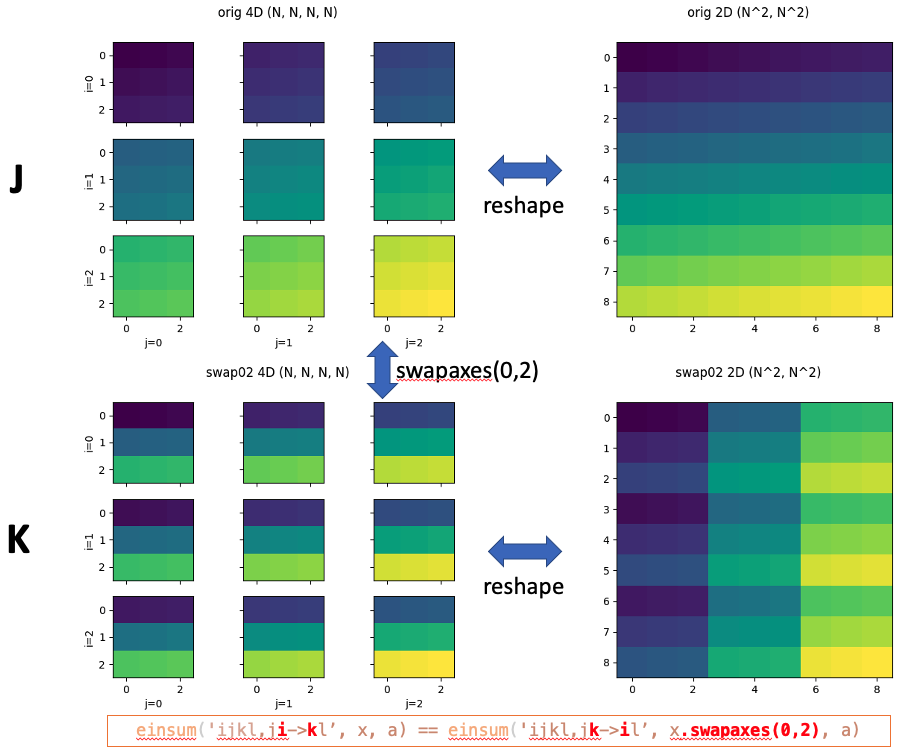

Run the following cell once to import needed packages and to define the plotting functions:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot4D(x, N, name=''):
    norm = mpl.colors.Normalize(vmin=np.min(x), vmax=np.max(x))

    fig, axs = plt.subplots(N, N)
    for i in range(N):
        for j in range(N):
            axs[i, j].imshow(x[i,j], norm=norm)
            axs[i, j].set_ylabel(f'i={i}')
            axs[i, j].set_xlabel(f'j={j}')
    
    for ax in axs.flat:
        ax.label_outer()

    fig.suptitle(name+' 4D (N, N, N, N)')
    plt.show()

def plot2D(x, N, name=''):
    norm = mpl.colors.Normalize(vmin=np.min(x), vmax=np.max(x))
    fig = plt.figure()
    plt.imshow(x, norm=norm)
    fig.suptitle(name+' 2D (N^2, N^2)')
    plt.show()

Run the following cell once to define N, generate ERI and dm and plot them:

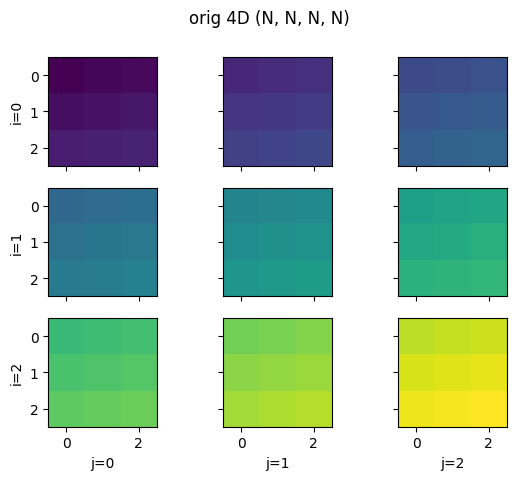

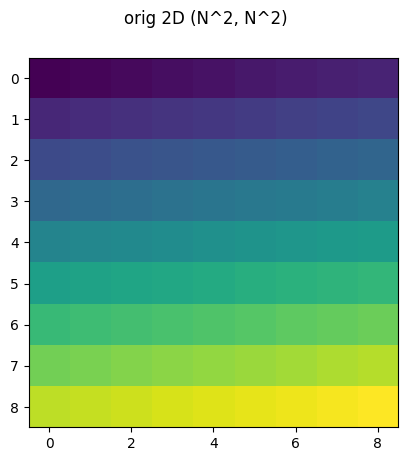

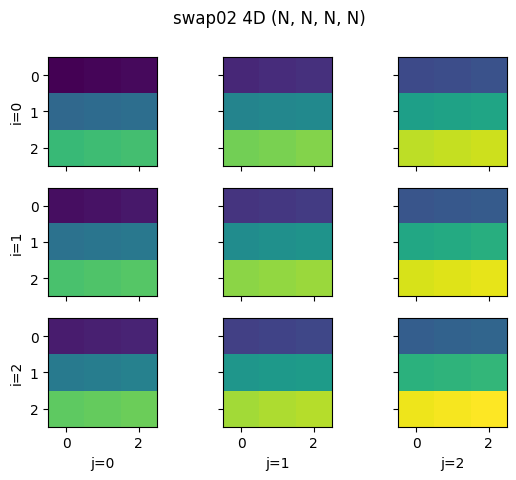

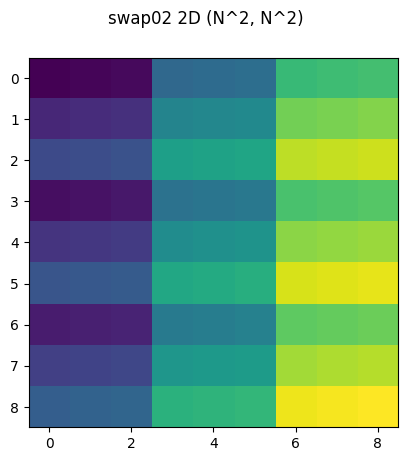

In [2]:
N = 3

ERI = np.arange(N**4).reshape(N, N, N, N)
dm = np.ones(N**2).reshape(N, N)

plot4D(ERI, N, name='orig')
plot2D(ERI.reshape(N**2, N**2), N, name='orig')
plot4D(ERI.swapaxes(0, 2), N, name='swap02')
plot2D(ERI.swapaxes(0, 2).reshape(N**2, N**2), N, name='swap02')

The following cell rewrites the J einsum with forloops and tests equality (order of loops can vary in this case, but using alphabetical order for consistency):

In [3]:
J_einsum = np.einsum('ijkl,ji->kl', ERI, dm)

J_forloop = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        for k in range(N):
            for l in range(N):
                J_forloop[k, l] += ERI[i,j,k,l] * dm[j,i]

assert np.equal(J_einsum, J_forloop).all()
print('PASS: J_einsum == J_forloop')

PASS: J_einsum == J_forloop


The following cell rewrites the K einsum with forloops and tests equality (order of loops can vary in this case, but using alphabetical order for consistency):

In [4]:
K_einsum = np.einsum('ijkl,jk->il', ERI, dm)

K_forloop = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        for k in range(N):
            for l in range(N):
                K_forloop[i, l] += ERI[i,j,k,l] * dm[j,k]

assert np.equal(K_einsum, K_forloop).all()
print('PASS: K_einsum == K_forloop')

PASS: K_einsum == K_forloop


The following cell proves that the einsum for K is the same as the one for J with first (0) and third (2) axes swapped (or vice-versa):

In [5]:
K_Jform_einsum = np.einsum('ijkl,ji->kl', ERI.swapaxes(0,2), dm)
assert np.equal(K_Jform_einsum, K_einsum).all()
print('PASS: K_Jform_einsum == K_einsum')

PASS: K_Jform_einsum == K_einsum
